# Visualizations: Custom Gradient Boosting vs. Existing Classifiers  

## Overview  
Comparison of a **custom Gradient Boosting classifier** with standard models:  
- **Random Forest**   
- **Sklearn GB**  

## Key Steps  
1. **Dataset**: Benchmark datasets (moon_data_dataset).  
2. **Training**: Identical splits for fair comparison.  
3. **Metrics**: Accuracy, precision-recall,F1, ROC curves.  
4. **Visualizations**:  
   - **Decision boundaries** (2D feature space).  
   - **Feature importance** (bar plots).  
   - **Performance metrics** (bar charts, confusion matrices).  

*(Visuals: Matplotlib/Seaborn plots embedded.)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os 
import pandas as pd
import seaborn as sns

# import sklearn for comparison
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier as SklearnGBC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay)
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve

# Add model path
import sys
sys.path.append("..")
from model.BoostingTree import GradientBoostingClassifier


# Set up plotting style
plt.style.use("seaborn-whitegrid")
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})
%matplotlib inline

## Generate Moons Dataset and Plot the visual graph

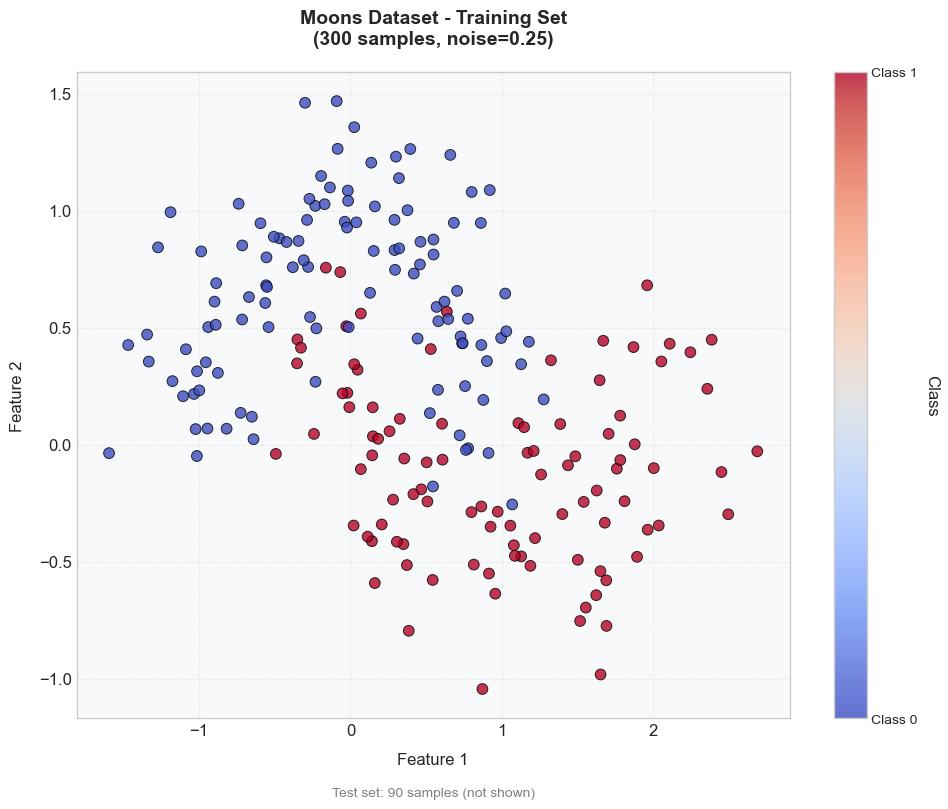

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate and split the data
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up the figure with professional styling
plt.figure(figsize=(10, 8), facecolor='white')

# Create the scatter plot with enhanced visual elements
scatter = plt.scatter(
    X_train[:, 0], 
    X_train[:, 1], 
    c=y_train, 
    cmap="coolwarm", 
    edgecolors='k', 
    s=60,
    alpha=0.8,
    linewidths=0.7
)

# Add professional styling elements
plt.title("Moons Dataset - Training Set\n(300 samples, noise=0.25)", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12, labelpad=10)
plt.ylabel("Feature 2", fontsize=12, labelpad=10)

# Customize the colorbar
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label('Class', rotation=270, labelpad=15, fontsize=12)
cbar.ax.set_yticklabels(['Class 0', 'Class 1'], fontsize=10)

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#f8f9fa')  # Light gray background
plt.tight_layout()

# Add annotation about the test set
plt.annotate(f"Test set: {len(X_test)} samples (not shown)", 
             xy=(0.5, -0.12), 
             xycoords='axes fraction',
             ha='center', 
             fontsize=10,
             color='gray')

plt.show()

## Initialize and configure the Custom Gradient Boosting Classifier

In [3]:
# Initialize and configure the Gradient Boosting Classifier
clf = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    subsample=0.8,
    random_state=42
)

# Train the model with timing
import time
print("Training Gradient Boosting Classifier...")
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds\n")

# Calculate predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Evaluate and print results with enhanced formatting
print("Model Performance Evaluation")
print("━" * 40)
print(f"{'Training Accuracy:':<25} {accuracy_score(y_train, y_train_pred):.4f}")
print(f"{'Test Accuracy:':<25} {accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Training Loss (Final):':<25} {clf.errors_[-1]:.4f}")
print("\n")

# Print model configuration
print("Model Configuration")
print("━" * 40)
print(f"{'Number of trees:':<25} {clf.n_estimators}")
print(f"{'Learning rate:':<25} {clf.learning_rate}")
print(f"{'Max tree depth:':<25} {clf.max_depth}")
print(f"{'Subsample ratio:':<25} {clf.subsample}")
print(f"{'Min samples split:':<25} {clf.min_samples_split}")

⏳ Training Gradient Boosting Classifier...
✅ Training completed in 0.86 seconds

📊 Model Performance Evaluation
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Training Accuracy:        0.9000
Test Accuracy:            0.9111
Training Loss (Final):    0.4676


⚙️ Model Configuration
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Number of trees:          20
Learning rate:            0.1
Max tree depth:           3
Subsample ratio:          0.8
Min samples split:        2


## Plot for the training loss over boosting iterations

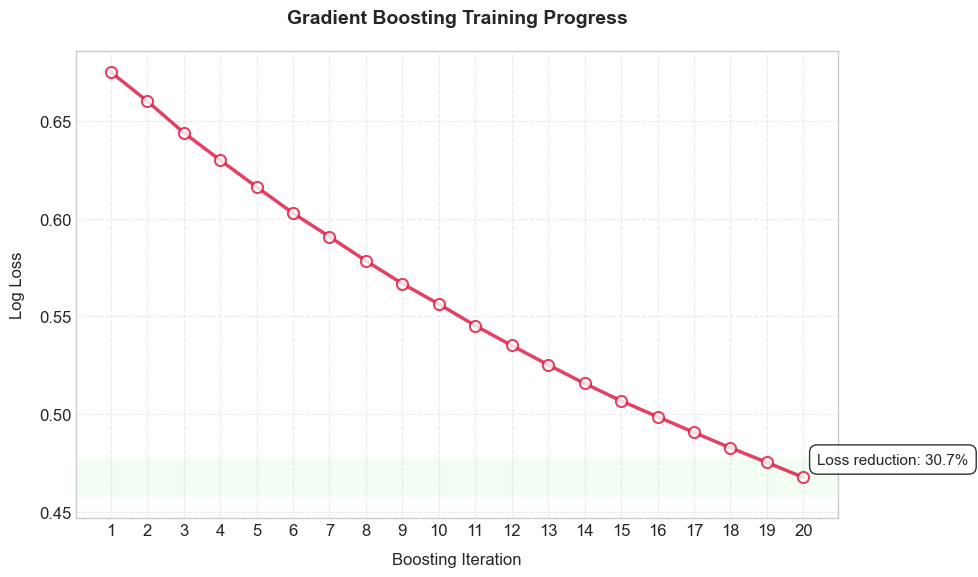

In [4]:
# Plot the training loss over boosting iterations
plt.figure(figsize=(10, 6), facecolor='white')

# Create the main plot
plt.plot(clf.errors_, 
         marker='o', 
         markersize=8,
         markerfacecolor='white',
         markeredgewidth=1.5,
         markeredgecolor='crimson',
         color='crimson', 
         linewidth=2.5,
         alpha=0.8)

# Add title and labels
plt.title("Gradient Boosting Training Progress", fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Boosting Iteration", fontsize=12, labelpad=10)
plt.ylabel("Log Loss", fontsize=12, labelpad=10)

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(range(0, len(clf.errors_)), range(1, len(clf.errors_)+1))  # 1-based iteration numbering

# Calculate improvement metrics
initial_loss = clf.errors_[0]
final_loss = clf.errors_[-1]
improvement = (initial_loss - final_loss)/initial_loss * 100

# Add annotation
plt.annotate(f"Loss reduction: {improvement:.1f}%", 
             xy=(len(clf.errors_)-1, final_loss),
             xytext=(10, 10), 
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
             fontsize=11)

# Add convergence region highlight
plt.axhspan(final_loss-0.01, final_loss+0.01, facecolor='lightgreen', alpha=0.1)

# Show plot
plt.tight_layout()
plt.show()

## Plot for decision boundary for the trained model

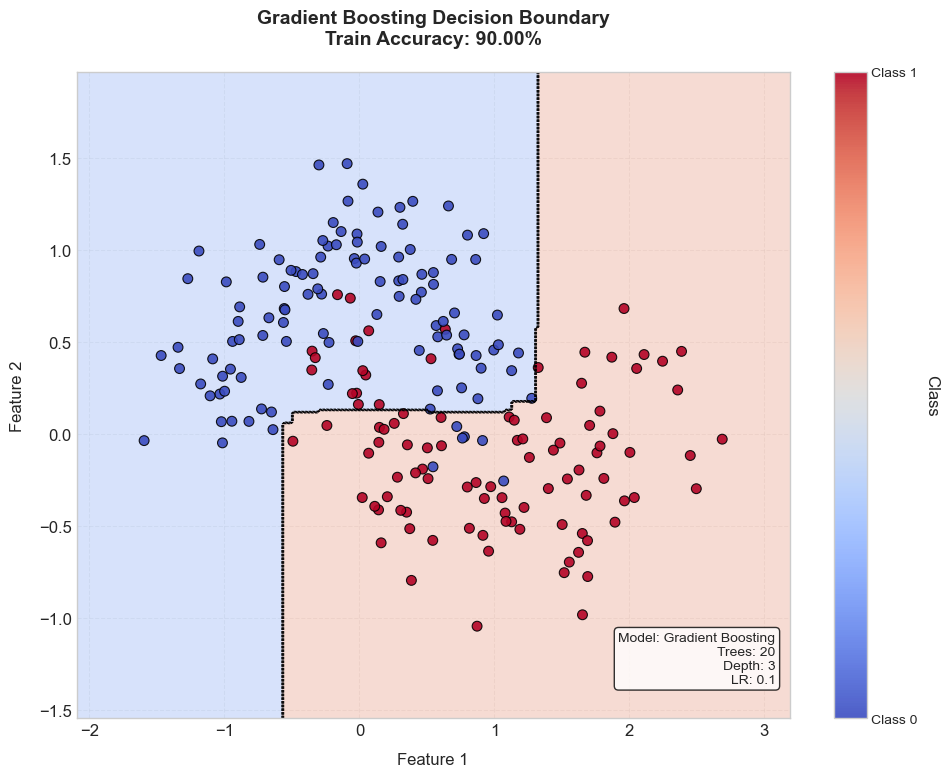

In [5]:
def plot_decision_boundary(clf, X, y, title="Decision Boundary", dataset_type="Train"):
    """
    Enhanced decision boundary visualization with:
    - Professional styling
    - Probability contours
    - Improved clarity
    - Additional metrics
    """
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Get predictions and probabilities
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Calculate accuracy for annotation
    accuracy = accuracy_score(y, clf.predict(X))
    
    # Set up the figure
    plt.figure(figsize=(10, 8), facecolor='white')
    
    # Plot decision boundary with probability contours
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.3, levels=1)
    plt.contour(xx, yy, Z, colors='black', linewidths=0.5, linestyles='dashed')
    
    # Plot data points with enhanced styling
    scatter = plt.scatter(
        X[:, 0], X[:, 1], 
        c=y, 
        cmap="coolwarm", 
        edgecolors='k', 
        s=50,
        linewidths=0.8,
        alpha=0.9
    )
    
    # Add professional styling elements
    plt.title(f"{title}\n{dataset_type} Accuracy: {accuracy:.2%}", 
              fontsize=14, pad=20, fontweight='bold')
    plt.xlabel("Feature 1", fontsize=12, labelpad=10)
    plt.ylabel("Feature 2", fontsize=12, labelpad=10)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ticks=[0, 1])
    cbar.set_label('Class', rotation=270, labelpad=15, fontsize=12)
    cbar.ax.set_yticklabels(['Class 0', 'Class 1'], fontsize=10)
    
    # Customize grid and layout
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.gca().set_facecolor('#f8f9fa')  # Light gray background
    plt.tight_layout()
    
    # Add model information annotation
    model_info = (f"Model: Gradient Boosting\n"
                  f"Trees: {clf.n_estimators}\n"
                  f"Depth: {clf.max_depth}\n"
                  f"LR: {clf.learning_rate}")
    
    plt.annotate(model_info, 
                 xy=(0.98, 0.05), 
                 xycoords='axes fraction',
                 ha='right', 
                 va='bottom',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                 fontsize=10)
    
    plt.show()

# Call the enhanced plot function
plot_decision_boundary(
    clf, 
    X_train, 
    y_train, 
    title="Gradient Boosting Decision Boundary",
    dataset_type="Train"
)

## Plot for decision boundary on the test data

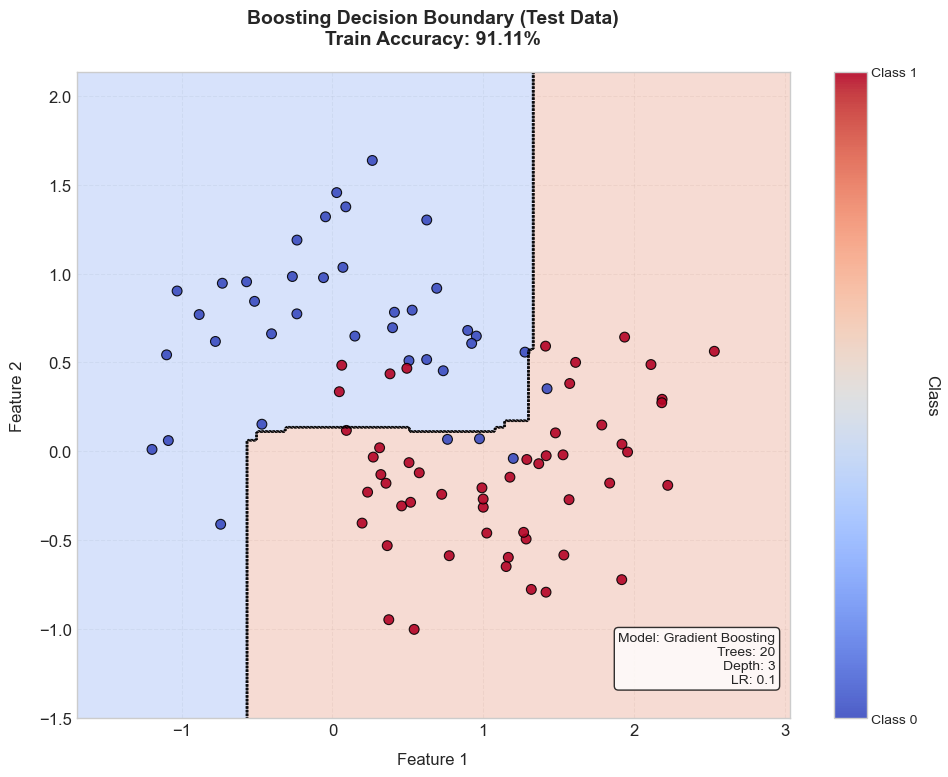

In [6]:
# Plot decision boundary on the test data
plot_decision_boundary(clf, X_test, y_test, title="Boosting Decision Boundary (Test Data)")

## Compare loss curves for different min_samples_leaf values

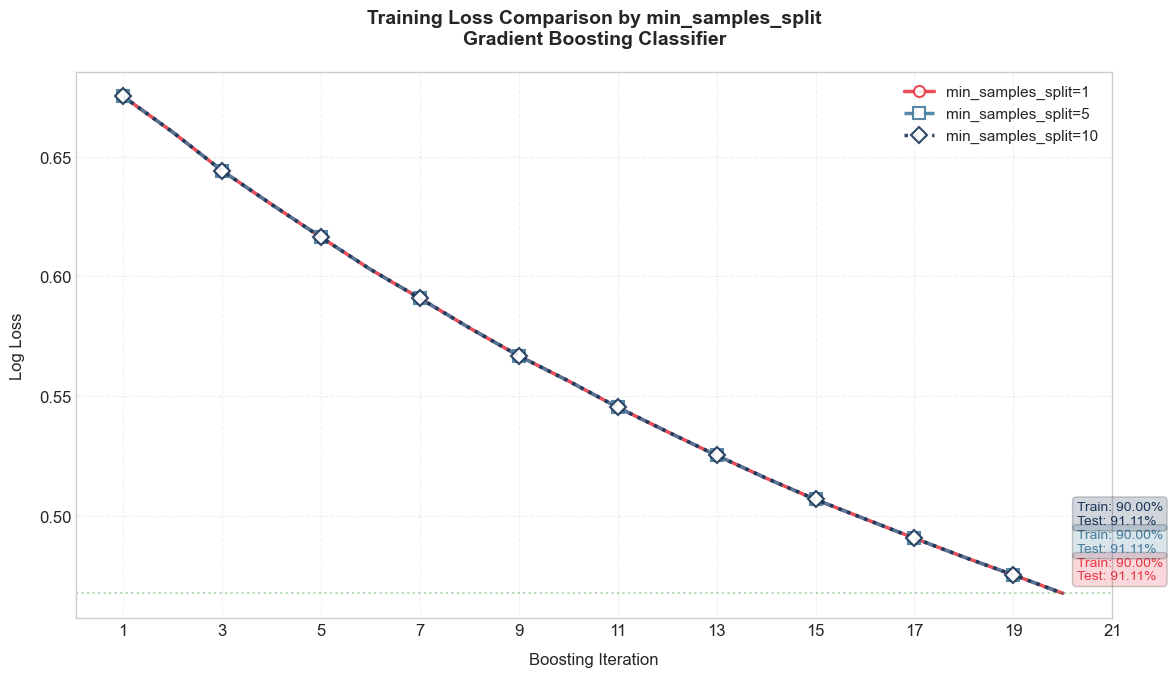


📊 Performance Comparison
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
min_samples_split   Train Accuracy      Test Accuracy       Final Loss     
1                   90.00%              91.11%              0.4676         
5                   90.00%              91.11%              0.4675         
10                  90.00%              91.11%              0.4675         


In [7]:
# Set up the comparison parameters
leaf_sizes = [1, 5, 10]
colors = ['#E63946', '#457B9D', '#1D3557']  # Professional color palette
line_styles = ['-', '--', ':'] 
markers = ['o', 's', 'D']  # Different markers for each curve
labels = [f'min_samples_split={leaf}' for leaf in leaf_sizes]

# Store results
results = []

plt.figure(figsize=(12, 7), facecolor='white')

# Train models and collect results
for i, leaf in enumerate(leaf_sizes):
    # Initialize and train model
    clf = GradientBoostingClassifier(
        n_estimators=20,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=leaf,
        subsample=0.8,
        random_state=42
    )
    clf.fit(X_train, y_train)
    
    # Store metrics
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    results.append((leaf, train_acc, test_acc, clf.errors_))
    
    # Plot loss curve with enhanced styling
    plt.plot(clf.errors_, 
             color=colors[i],
             linestyle=line_styles[i],
             marker=markers[i],
             markevery=2,
             markersize=8,
             markerfacecolor='white',
             markeredgewidth=1.5,
             linewidth=2.5,
             alpha=0.9,
             label=labels[i])

# Add professional styling elements
plt.title('Training Loss Comparison by min_samples_split\nGradient Boosting Classifier', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Boosting Iteration', fontsize=12, labelpad=10)
plt.ylabel('Log Loss', fontsize=12, labelpad=10)
plt.xticks(range(0, 21, 2), range(1, 22, 2))  # 1-based iteration numbering

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.3)
legend = plt.legend(fontsize=11, framealpha=0.9)
legend.get_frame().set_facecolor('#f8f9fa')

# Add accuracy annotations
for i, (leaf, train_acc, test_acc, _) in enumerate(results):
    plt.annotate(f'Train: {train_acc:.2%}\nTest: {test_acc:.2%}',
                 xy=(19, results[i][3][-1]),
                 xytext=(10, 10 + i*20),
                 textcoords='offset points',
                 bbox=dict(boxstyle='round', facecolor=colors[i], alpha=0.2),
                 fontsize=10,
                 color=colors[i])

# Highlight final loss differences
plt.axhline(y=min([r[3][-1] for r in results]), 
            color='green', 
            linestyle=':', 
            alpha=0.3,
            label='Best Final Loss')

plt.tight_layout()
plt.show()

# Print detailed comparison table
print("\n Performance Comparison")
print("━" * 50)
print(f"{'min_samples_split':<20}{'Train Accuracy':<20}{'Test Accuracy':<20}{'Final Loss':<15}")
for leaf, train_acc, test_acc, errors in results:
    print(f"{leaf:<20}{train_acc:<20.2%}{test_acc:<20.2%}{errors[-1]:<15.4f}")

## In the following cells we will be evealuating the custom model with existing models

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate a model, returning performance metrics."""
    # Time the training
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Time the prediction
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Get probabilities
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except (AttributeError, IndexError):
        y_prob = y_pred  # Fallback if predict_proba is not available
    
    # Calculate metrics
    metrics = {
        'model_name': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'training_time': training_time,
        'prediction_time': prediction_time,
        'conf_matrix': confusion_matrix(y_test, y_pred),
        'model': model  # Store model for later analysis
    }
    
    return metrics

In [9]:
def plot_metric_comparison(results, metric, figsize=(12, 7)):
 
    # Prepare data
    values = [result[metric] for result in results]
    names = [result['model_name'] for result in results]
    
    # Set up the figure
    plt.figure(figsize=figsize, facecolor='white')
    
    # Choose appropriate color palette based on metric
    if 'accuracy' in metric.lower() or 'auc' in metric.lower():
        palette = sns.color_palette("Blues_d", len(values))
    elif 'time' in metric.lower():
        palette = sns.color_palette("Reds_d", len(values))
    else:
        palette = sns.color_palette("viridis", len(values))
    
    # Create the bar plot with enhanced styling
    ax = sns.barplot(
        x=names, 
        y=values, 
        palette=palette,
        edgecolor='black',
        linewidth=0.5,
        alpha=0.85
    )
    
    # Add professional styling elements
    metric_title = metric.replace('_', ' ').title()
    plt.title(f'Model Comparison by {metric_title}', 
              fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Model', fontsize=13, labelpad=10)
    plt.ylabel(metric_title, fontsize=13, labelpad=10)
    
    # Set appropriate y-axis limits
    if 'accuracy' in metric.lower() or 'auc' in metric.lower():
        plt.ylim(0, 1.05)
    elif 'time' in metric.lower():
        plt.ylim(0, max(values)*1.1)
    else:
        plt.ylim(0, max(values)*1.05 if max(values) > 0 else 1)
    
    # Rotate x-labels and adjust layout
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=11)
    
    # Add value annotations with smart formatting
    for i, v in enumerate(values):
        if 'time' in metric.lower():
            annotation = f"{v:.2f}s" if v < 60 else f"{v/60:.1f}m"
        elif 0 <= v <= 1:
            annotation = f"{v:.2%}"
        else:
            annotation = f"{v:.2f}"
        
        ax.text(
            i, 
            v + (0.02 * max(values)), 
            annotation,
            ha='center',
            va='bottom',
            fontsize=12,
            bbox=dict(
                boxstyle='round',
                facecolor='white',
                alpha=0.8,
                edgecolor='none',
                pad=0.2
            )
        )
    
    # Add grid and clean layout
    plt.grid(True, axis='y', linestyle='--', alpha=0.4)
    plt.gca().set_facecolor('#f8f9fa')  # Light gray background
    plt.tight_layout()
    
    # Highlight the best performer
    if 'time' in metric.lower():
        best_idx = np.argmin(values)
    else:
        best_idx = np.argmax(values)
    
    ax.patches[best_idx].set_edgecolor('green')
    ax.patches[best_idx].set_linewidth(2)
    
    plt.show()

In [10]:
def plot_roc_curves(results, X_test, y_test):
    """Plot ROC curves comparison."""
    plt.figure(figsize=(10, 8))
    for result in results:
        try:
            RocCurveDisplay.from_estimator(result['model'], X_test, y_test, name=result['model_name'])
        except:
            continue
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title('ROC Curves Comparison', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.close()

In [11]:
def plot_calibration_curaves(results, X_test, y_test):
    """Plot calibration curves comparison."""
    plt.figure(figsize=(10, 8))
    for result in results:
        try:
            prob_true, prob_pred = calibration_curve(y_test, result['model'].predict_proba(X_test)[:, 1], n_bins=10)
            plt.plot(prob_pred, prob_true, 's-', label=result['model_name'])
        except:
            continue
    
    plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability', fontsize=12)
    plt.ylabel('Fraction of positives', fontsize=12)
    plt.title('Calibration Curves Comparison', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [12]:
def plot_confusion_matrices(results, X_test, y_test):
    """Plot confusion matrices for all models."""
    for result in results:
        model = result['model']
        model_name = result['model_name']
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted: 0', 'Predicted: 1'],
                    yticklabels=['Actual: 0', 'Actual: 1'])
        
        plt.title(f'Confusion Matrix: {model_name}', fontsize=14)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()


In [13]:
def plot_feature_importances(results, feature_names=None):
    """Plot feature importance for tree-based models."""
    for result in results:
        model = result['model']
        model_name = result['model_name']

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1][:15]  # Top 15 features
            
            if feature_names is not None:
                names = [feature_names[i] for i in indices]
            else:
                names = [f'Feature {i}' for i in indices]
            
            plt.figure(figsize=(10, 6))
            sns.barplot(x=importances[indices], y=names, palette="rocket")
            plt.title(f'Feature Importance: {model_name}', fontsize=16)
            plt.xlabel('Importance Score', fontsize=12)
            plt.ylabel('Features', fontsize=12)
            plt.grid(True, axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()


In [21]:

## read the file
data = pd.read_csv('../model/test_data/moon_data_dataset.csv')

# split features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

feature_names = data.columns[:-1].tolist()

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
print(f"\nData shapes - Train: {X_train.shape}, Test: {X_test.shape}")
    
# Initialize models
models = [
        {
            'model': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
            'name': 'Custom Gradient Boosting'
        },
        {
            'model': SklearnGBC(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
            'name': 'Sklearn Gradient Boosting'
        },
        {
            'model': RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42),
            'name': 'Random Forest'
        }
    ]
    
# Evaluate all models
print("\nEvaluating models...")
results = []
for model_info in models:
    print(f"\nTraining {model_info['name']}...")
    result = evaluate_model(model_info['model'], X_train, X_test, y_train, y_test, model_info['name'])
    results.append(result)
    print(f"Completed {model_info['name']}. Accuracy: {result['accuracy']:.3f}")
    
    


Data shapes - Train: (700, 2), Test: (300, 2)

Evaluating models...

Training Custom Gradient Boosting...
Completed Custom Gradient Boosting. Accuracy: 0.907

Training Sklearn Gradient Boosting...
Completed Sklearn Gradient Boosting. Accuracy: 0.923

Training Random Forest...
Completed Random Forest. Accuracy: 0.893



Generating comparison plots...


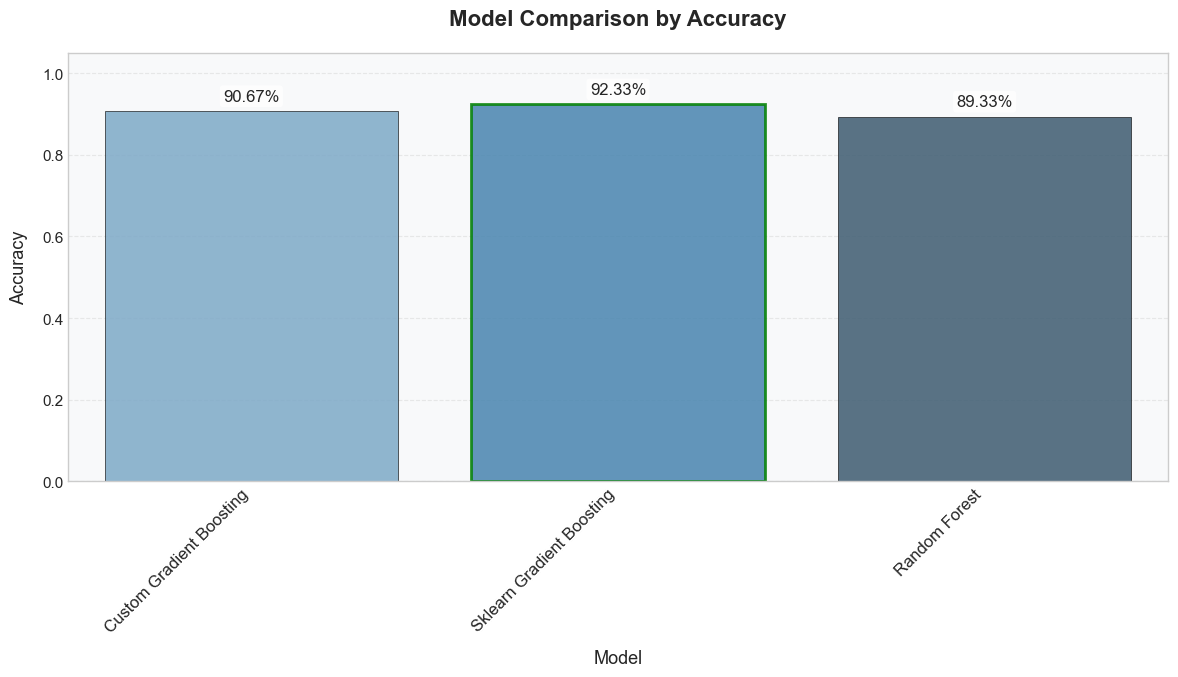

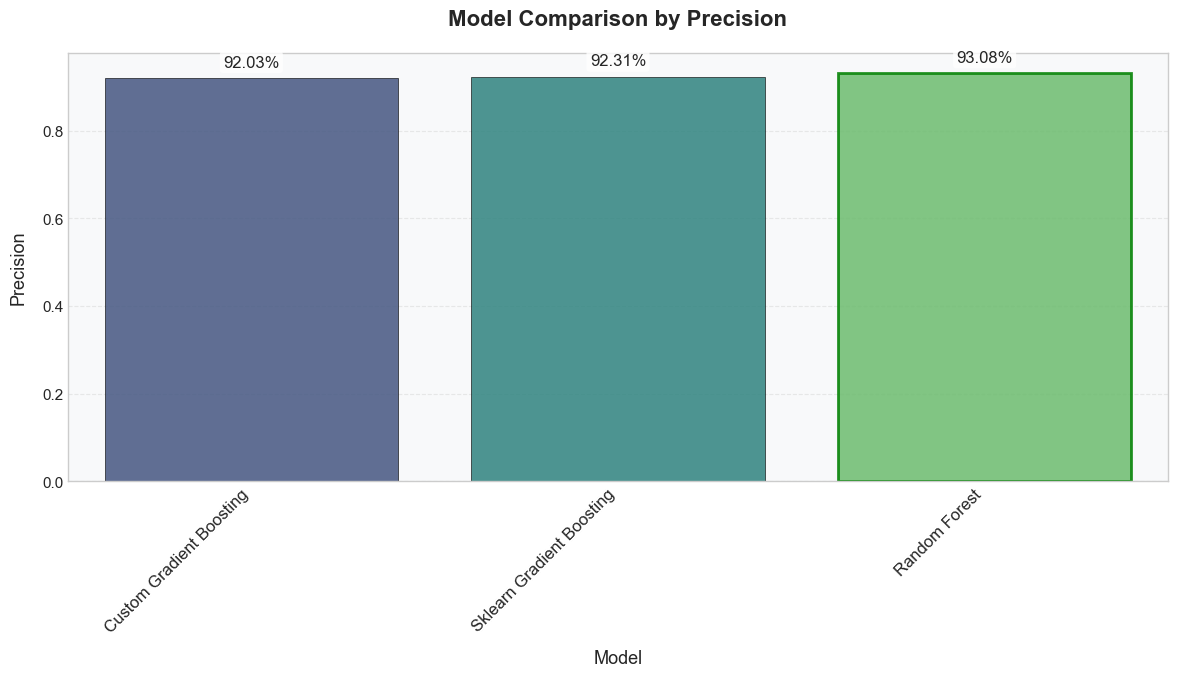

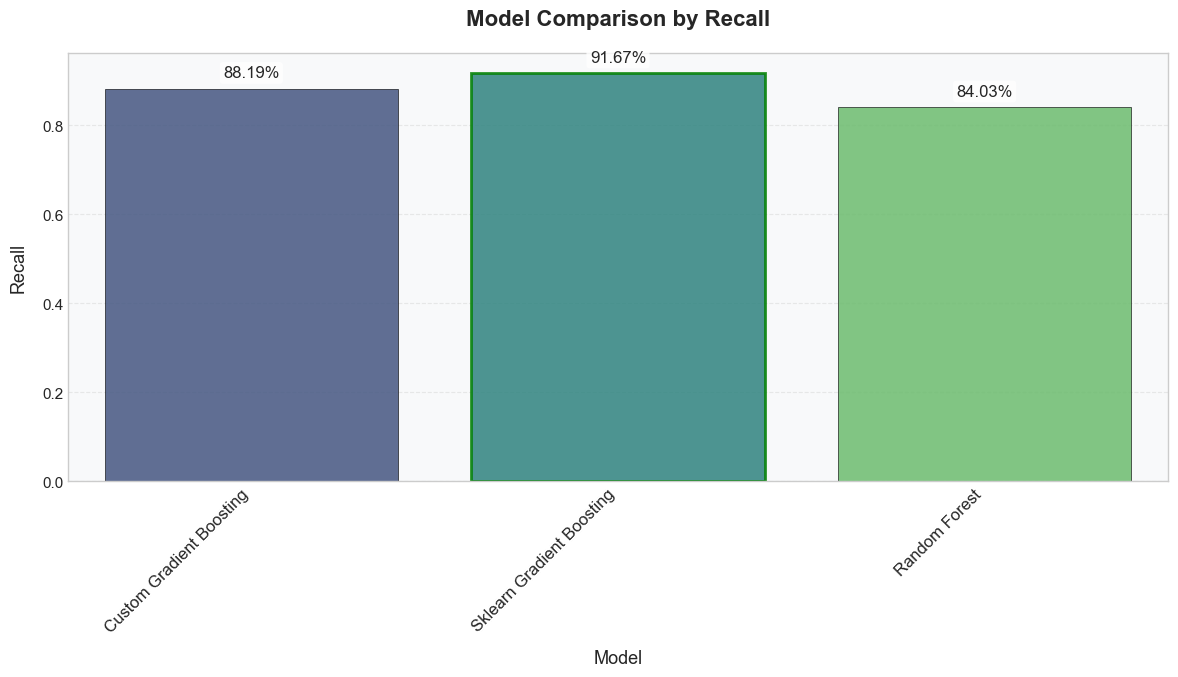

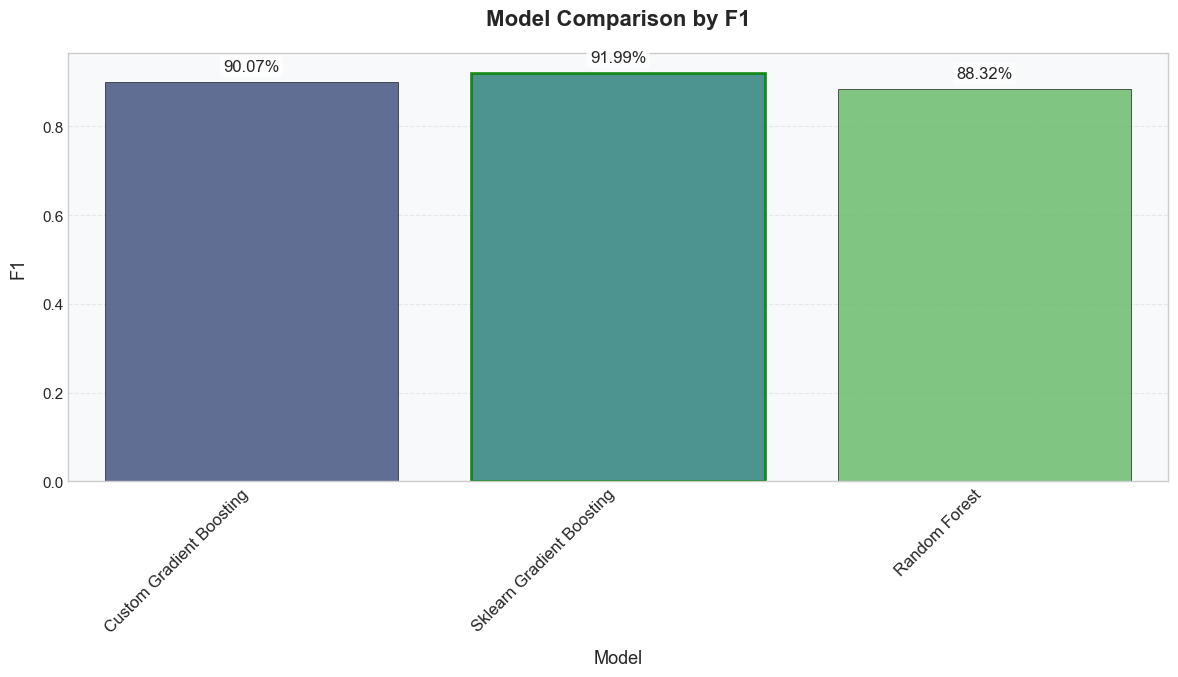

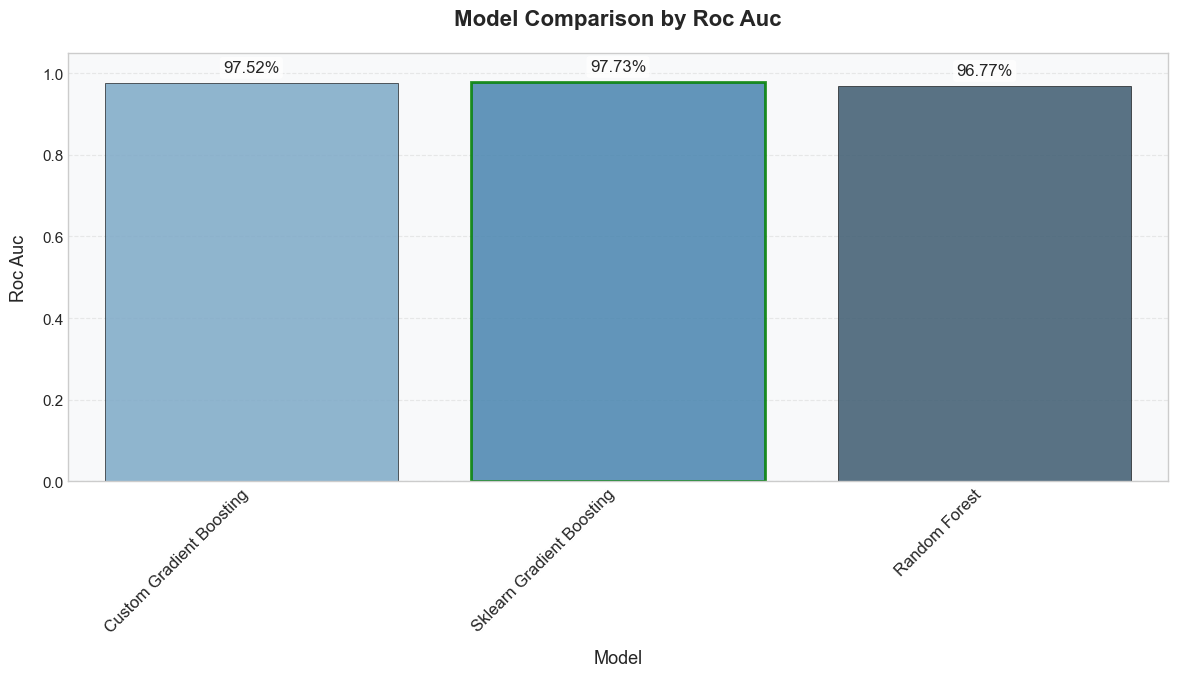

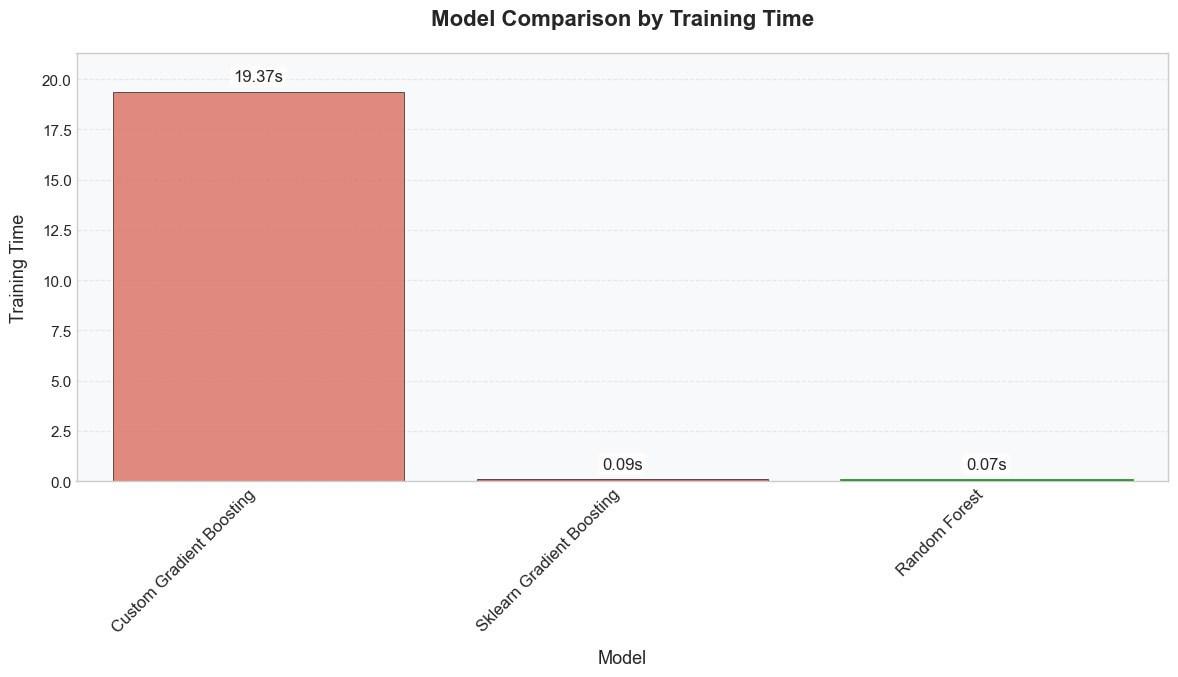

In [22]:
 # Generate all plots
print("\nGenerating comparison plots...")
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'training_time']
for metric in metrics:
    plot_metric_comparison(results, metric)

<Figure size 1000x800 with 0 Axes>

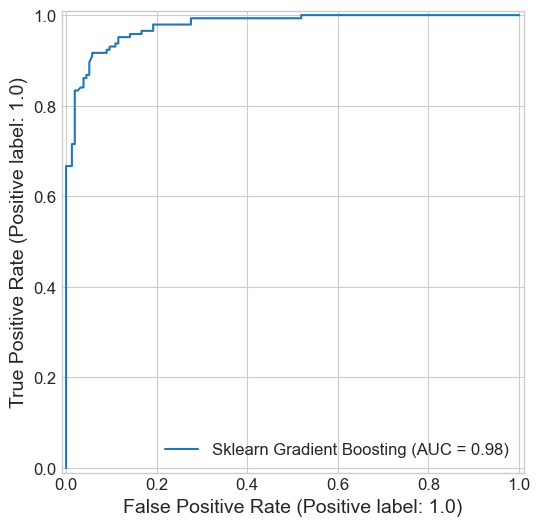

In [24]:
plot_roc_curves(results, X_test, y_test)

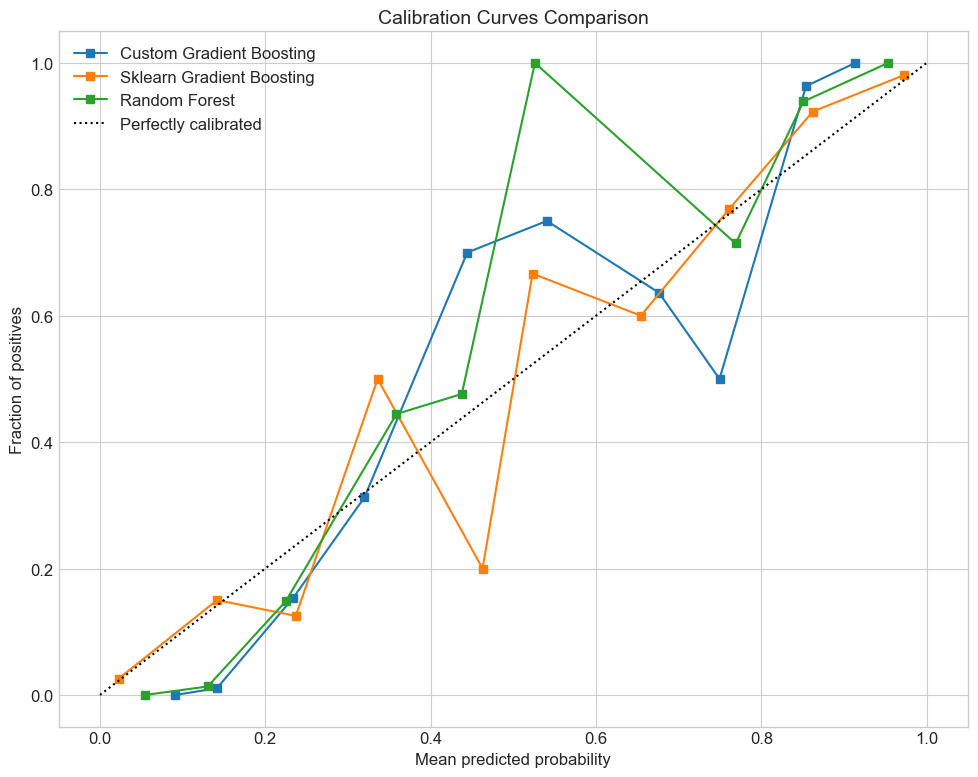

In [25]:
plot_calibration_curaves(results, X_test, y_test)

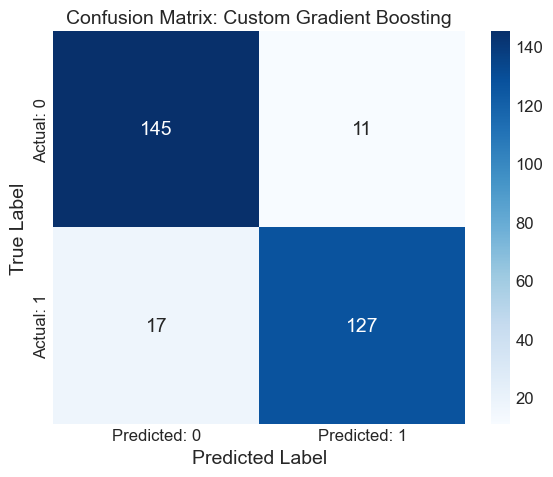

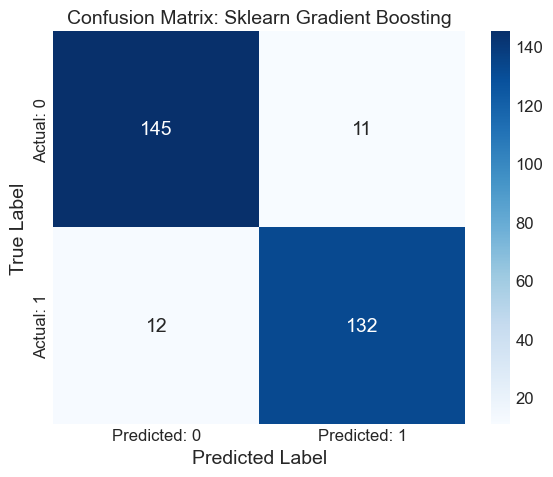

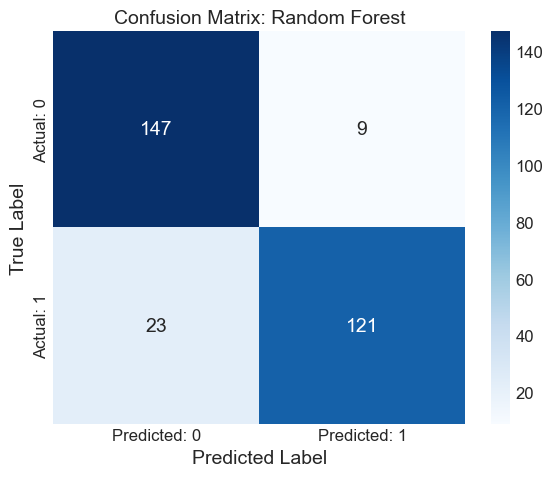

In [26]:
plot_confusion_matrices(results, X_test, y_test)


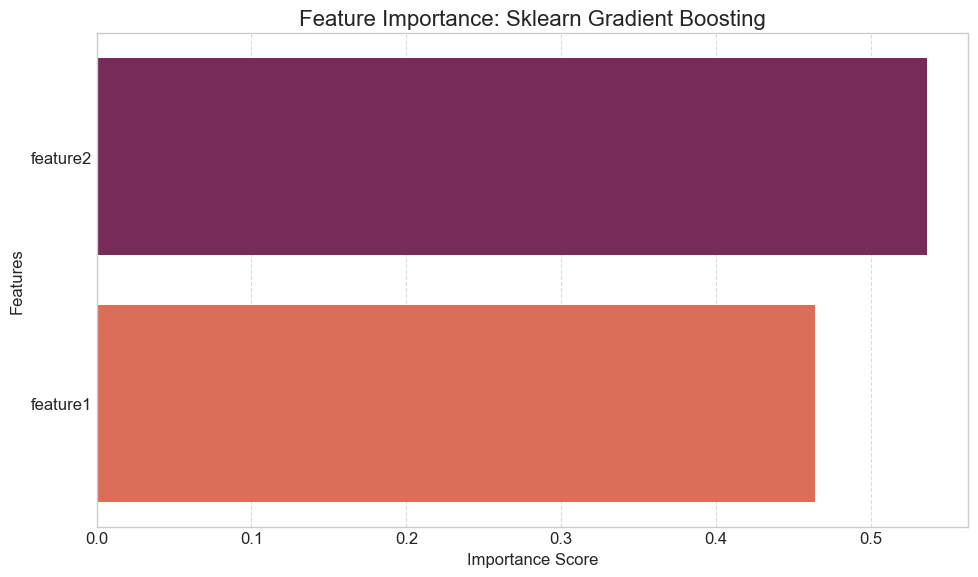

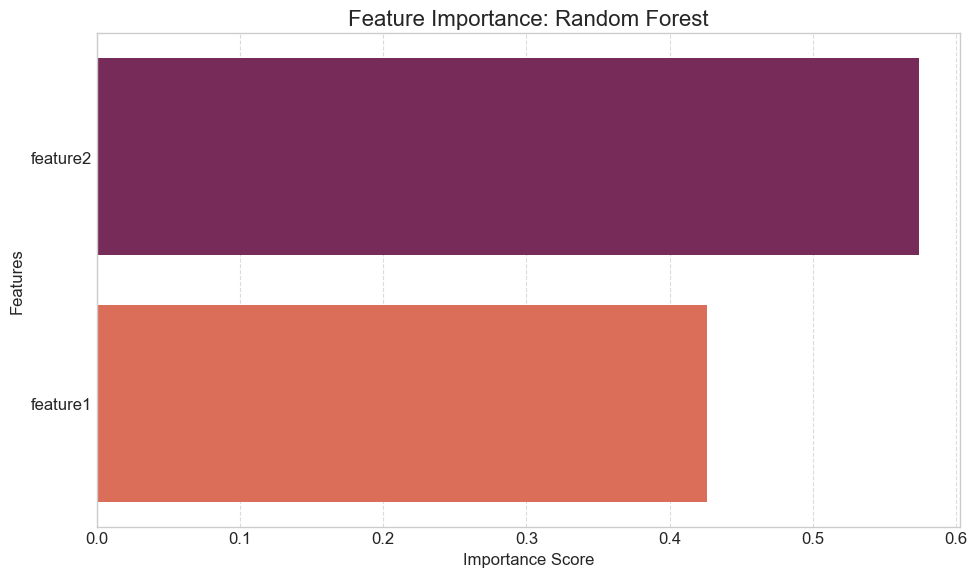

In [27]:
plot_feature_importances(results, feature_names)


In [28]:
# Print summary
print("\n=== Model Comparison Summary ===")
summary_df = pd.DataFrame(results).drop(['model', 'conf_matrix'], axis=1)
print(summary_df.to_markdown(index=False))


=== Model Comparison Summary ===
| model_name                |   accuracy |   precision |   recall |       f1 |   roc_auc |   training_time |   prediction_time |
|:--------------------------|-----------:|------------:|---------:|---------:|----------:|----------------:|------------------:|
| Custom Gradient Boosting  |   0.906667 |    0.92029  | 0.881944 | 0.900709 |  0.97516  |      19.3686    |        0.0222471  |
| Sklearn Gradient Boosting |   0.923333 |    0.923077 | 0.916667 | 0.919861 |  0.977319 |       0.094352  |        0.00254703 |
| Random Forest             |   0.893333 |    0.930769 | 0.840278 | 0.883212 |  0.967659 |       0.0707982 |        0.0026629  |



### **Key Observations**  
1. **Performance**:  
   - **Sklearn's Gradient Boosting** performs best in accuracy, recall, and F1.  
   - **Custom GBM** is competitive but slower due to unoptimized implementation.  
   - **Random Forest** has high precision but lower recall, indicating conservative predictions.  

2. **Speed**:  
   - **Sklearn’s GBM** is ~200x faster in training than the custom implementation.  
   - **Random Forest** has the fastest prediction time.  

3. **Limitations**:  
   - **Binary Classification Only**: These models (especially custom GBM) are designed for binary tasks. Multi-class support would require modifications (e.g., One-vs-Rest).  
 

### **Next Steps for Improvement**  

1. **Missing Value Handling**  
   - Integrate **split-aware imputation** (e.g., median/mean per node) to handle missing values without breaking the tree structure.  
   - Compare with sklearn’s `HistGradientBoosting`, which natively supports missing values. 
   
2. **Early Stopping**  
   - Implement **validation loss-based early stopping** to prevent overfitting and reduce training time.  
   - Monitor a held-out validation set and halt training if performance plateaus.  

3. **Multiclass Support**  
   - Extend the model to **multi-class classification** using:  
     - **One-vs-Rest (OvR)** strategy.  
     - **Native multi-class boosting** (e.g., softmax probabilities for gradient updates).  

4. **Pruning & Tree Dropout**  
   - Add **post-training pruning** to simplify trees and improve generalization.  
   - Experiment with **tree dropout** (randomly omitting trees during inference) for robustness.  

5. **Model Export**  
   - Support **JSON/binary serialization** for:  
     - **Interoperability** (e.g., deploy in C++/JavaScript).  
     - **Version control** of trained models.  



*(Note: Results are based on a moons dataset with 80-20 train-test split.)*